In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset2=pd.read_csv('/content/train.csv')

## print shape of dataset with rows and columns
print(dataset2.shape)

(1460, 81)


In [ ]:
dataset1=pd.read_csv('/content/test.csv')

## print shape of dataset with rows and columns
print(dataset1.shape)

(1459, 80)


In [ ]:
dataset = pd.concat([dataset2,dataset1],axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [ ]:
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
Functional          2
GarageArea          1
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
Id                  0
KitchenAbvGr        0
KitchenQua

In [ ]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Alley 0.9322  % missing values
BsmtCond 0.0281  % missing values
BsmtExposure 0.0281  % missing values
BsmtFinType1 0.0271  % missing values
BsmtFinType2 0.0274  % missing values
BsmtFullBath 0.0007  % missing values
BsmtHalfBath 0.0007  % missing values
BsmtQual 0.0277  % missing values
Fence 0.8044  % missing values
FireplaceQu 0.4865  % missing values
Functional 0.0007  % missing values
GarageCond 0.0545  % missing values
GarageFinish 0.0545  % missing values
GarageQual 0.0545  % missing values
GarageType 0.0538  % missing values
GarageYrBlt 0.0545  % missing values
LotFrontage 0.1665  % missing values
MSZoning 0.0014  % missing values
MasVnrArea 0.0079  % missing values
MasVnrType 0.0082  % missing values
MiscFeature 0.964  % missing values
PoolQC 0.9966  % missing values
SalePrice 0.4998  % missing values
Utilities 0.0007  % missing values


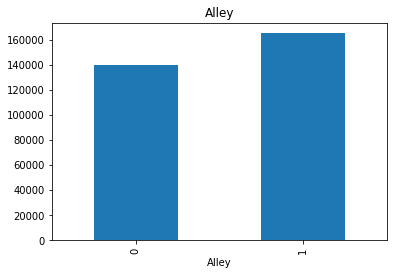

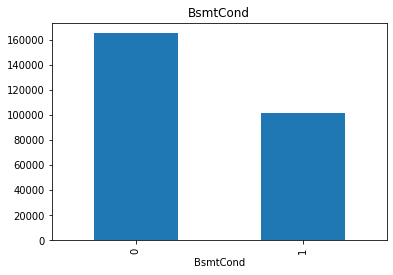

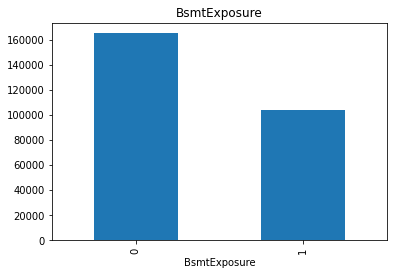

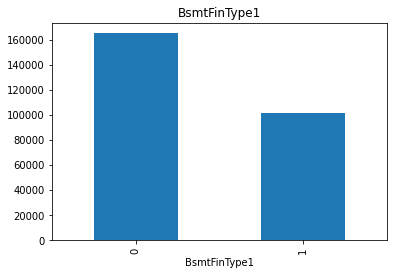

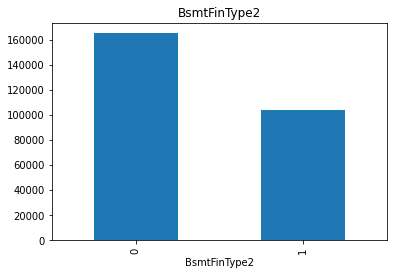

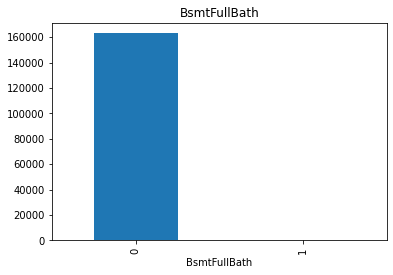

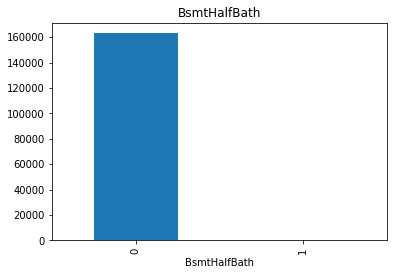

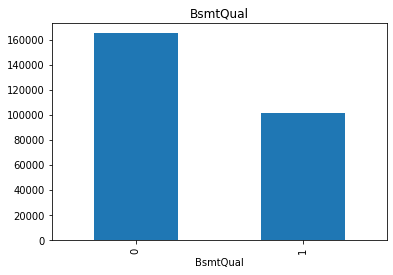

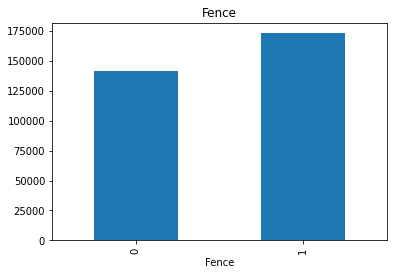

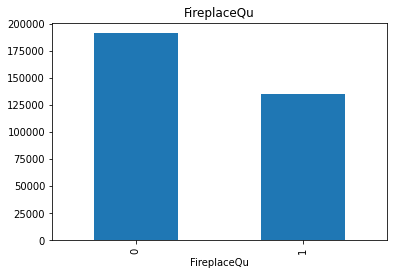

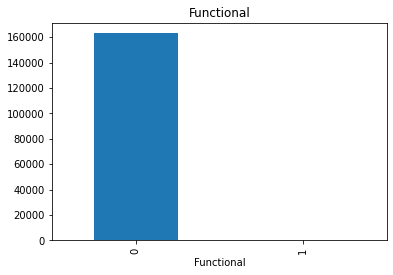

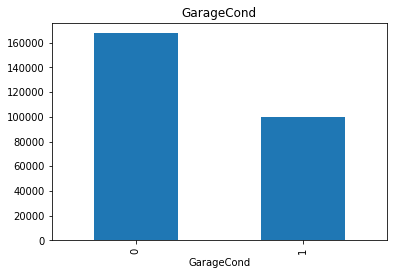

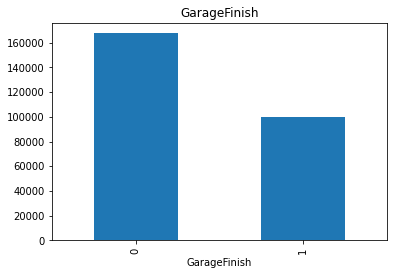

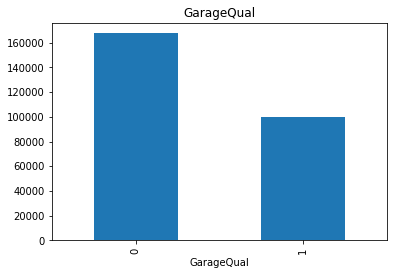

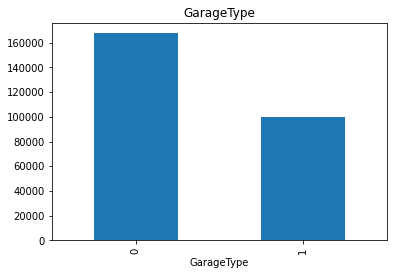

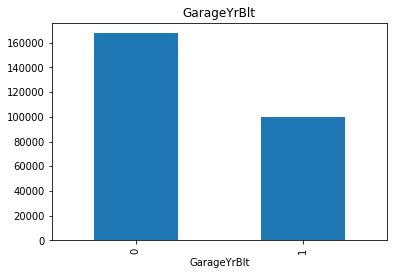

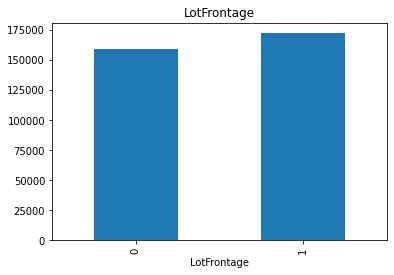

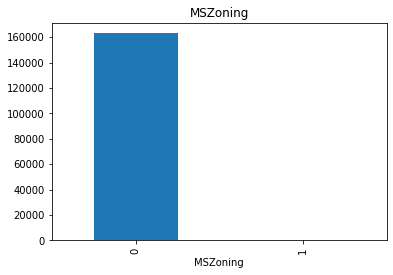

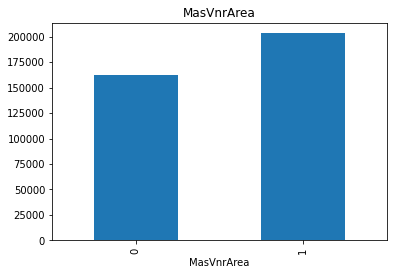

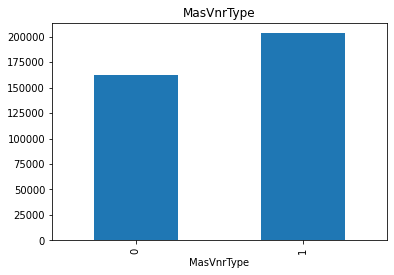

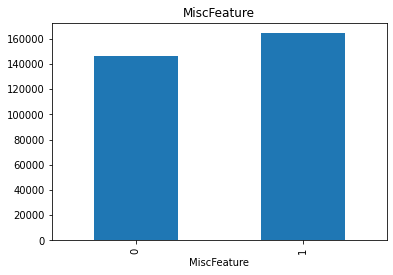

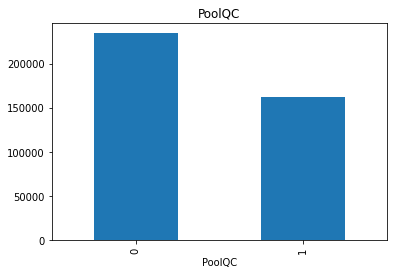

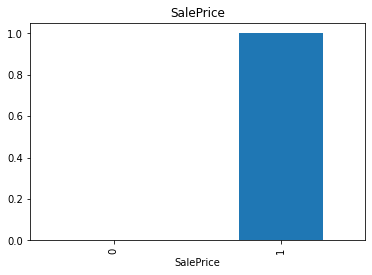

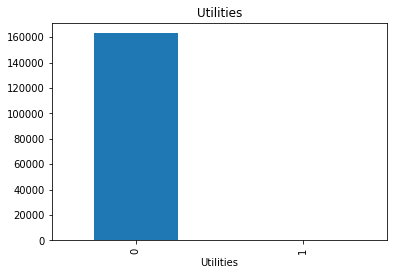

In [ ]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [ ]:
print("Id of Houses {}".format(len(dataset.Id)))

Id of Houses 2919


In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  38


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,208500.0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500.0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,223500.0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,140000.0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,250000.0,0,9,1145.0,192,2000,2000,2008


In [ ]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']

In [ ]:
dataset.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1454    1970
1455    1970
1456    1960
1457    1992
1458    1993
Name: YearBuilt, Length: 2919, dtype: int64

Text(0.5, 1.0, 'House Price vs YearSold')

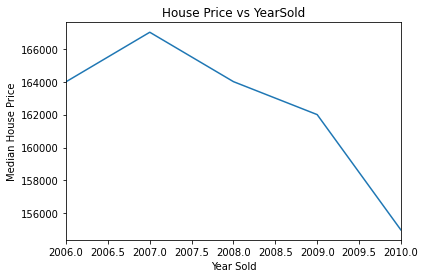

In [ ]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

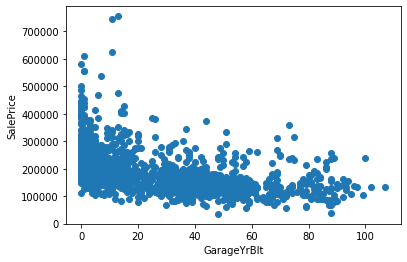

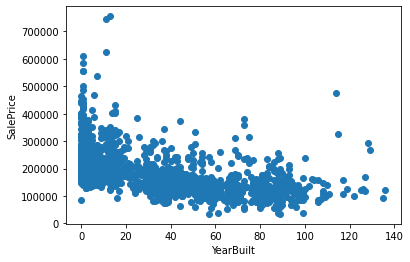

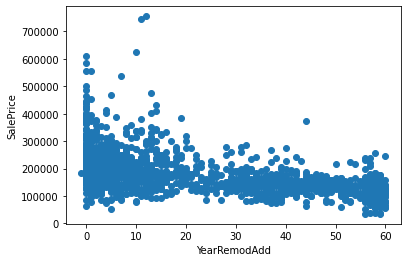

In [ ]:
for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 14


In [ ]:
discrete_feature

['BedroomAbvGr',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Fireplaces',
 'FullBath',
 'GarageCars',
 'HalfBath',
 'KitchenAbvGr',
 'MSSubClass',
 'MoSold',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'TotRmsAbvGrd']

In [ ]:
dataset[discrete_feature].head()

,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,Fireplaces,FullBath,GarageCars,HalfBath,KitchenAbvGr,MSSubClass,MoSold,OverallCond,OverallQual,PoolArea,TotRmsAbvGrd
0,3,1.0,0.0,0,2,2.0,1,1,60,2,5,7,0,8
1,3,0.0,1.0,1,2,2.0,0,1,20,5,8,6,0,6
2,3,1.0,0.0,1,2,2.0,1,1,60,9,5,7,0,6
3,3,1.0,0.0,1,1,3.0,0,1,70,2,5,7,0,7
4,4,1.0,0.0,1,2,3.0,1,1,60,12,5,8,0,9


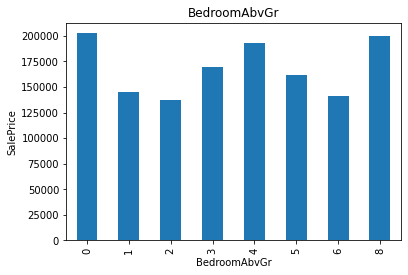

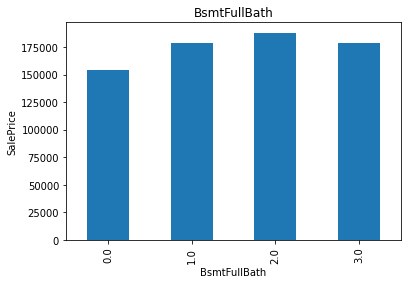

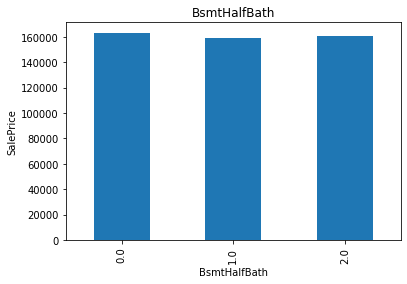

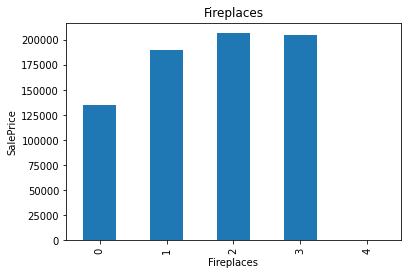

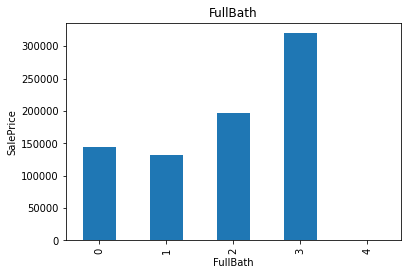

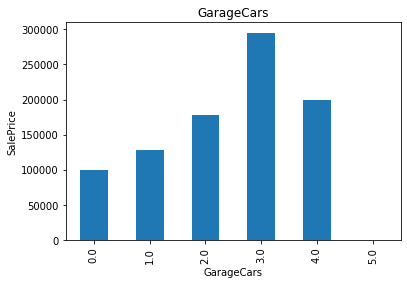

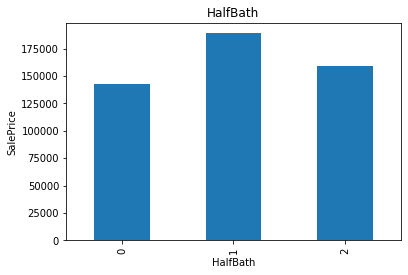

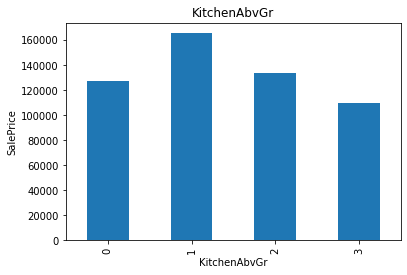

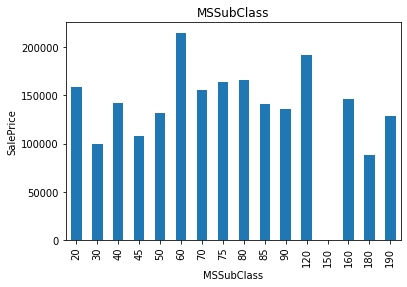

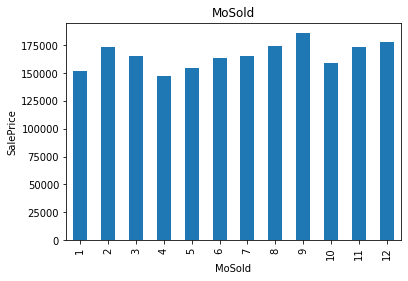

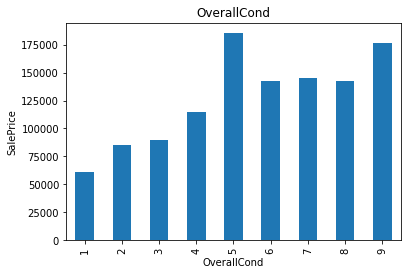

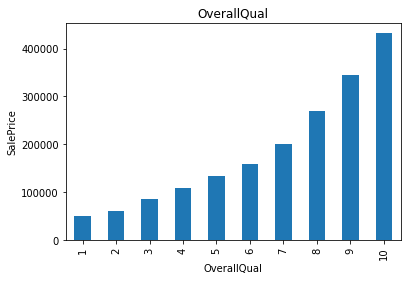

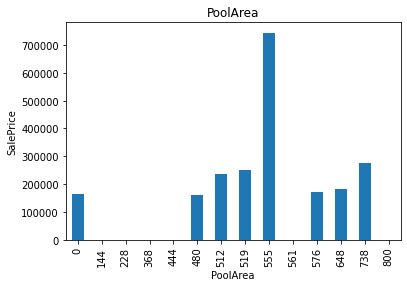

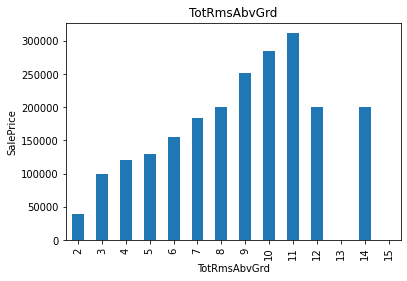

In [ ]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


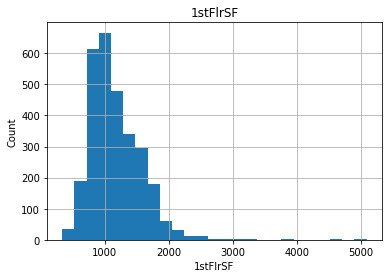

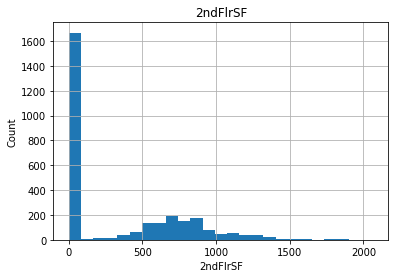

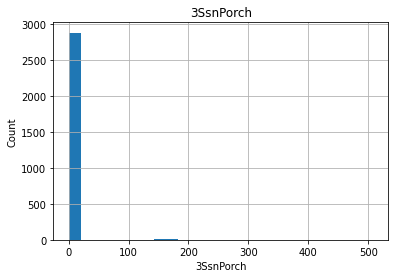

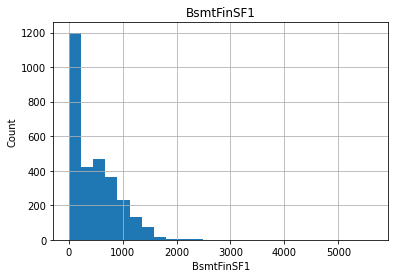

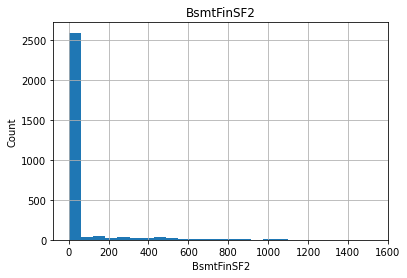

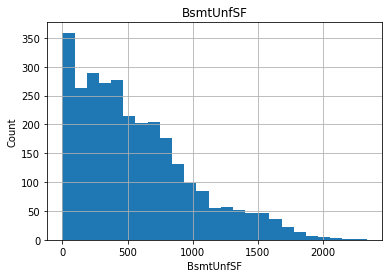

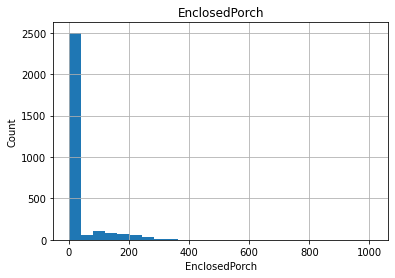

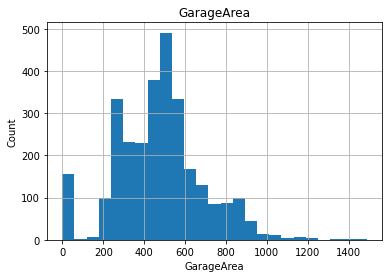

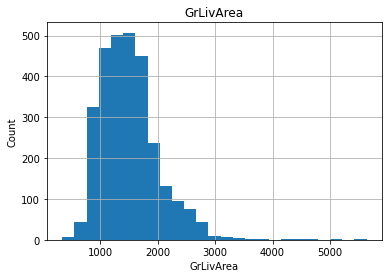

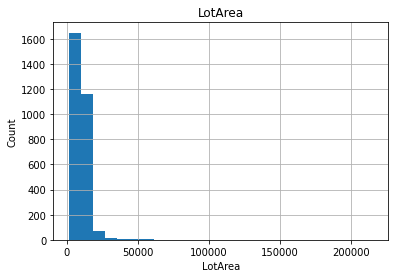

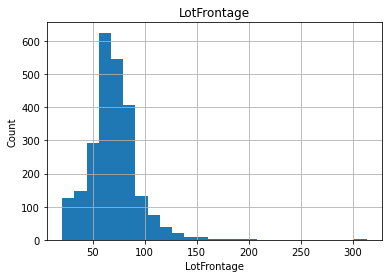

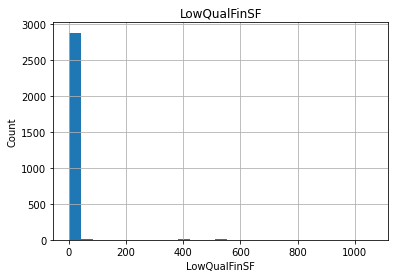

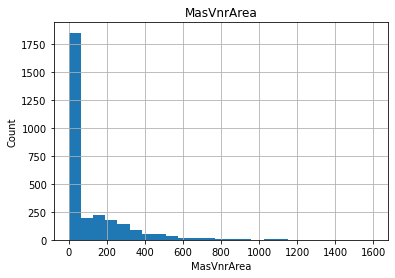

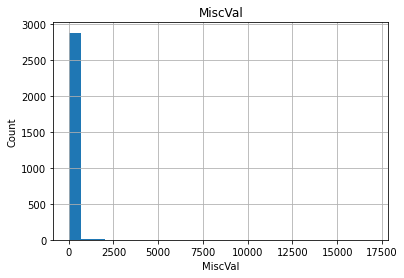

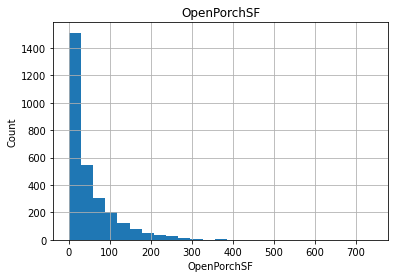

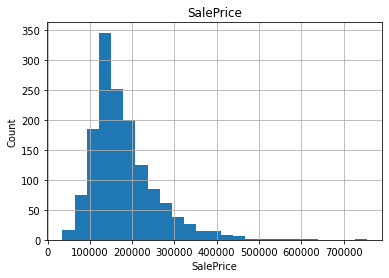

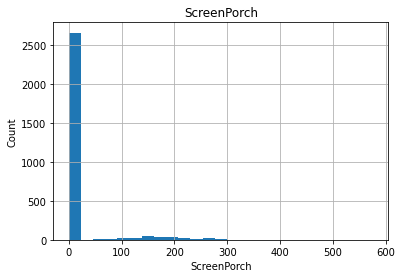

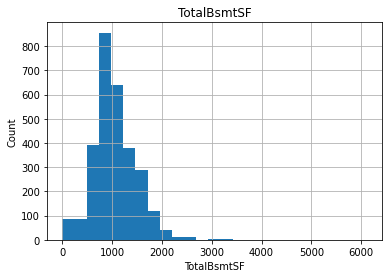

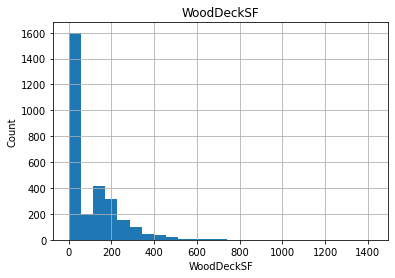

In [ ]:

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

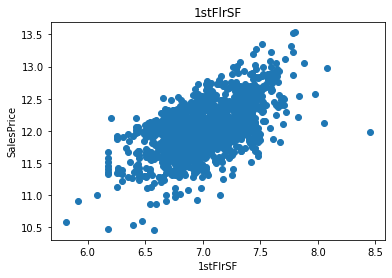

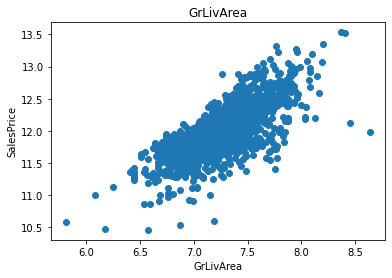

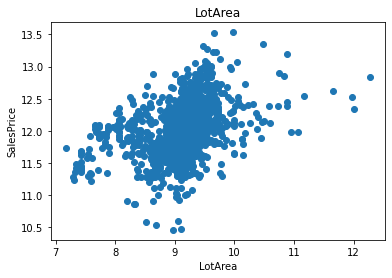

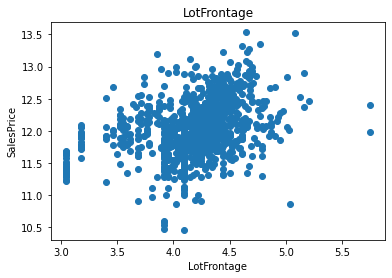

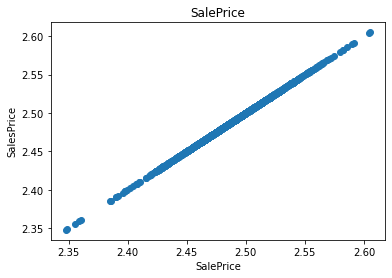

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

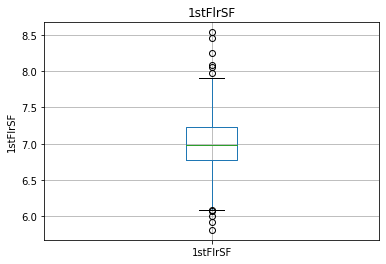

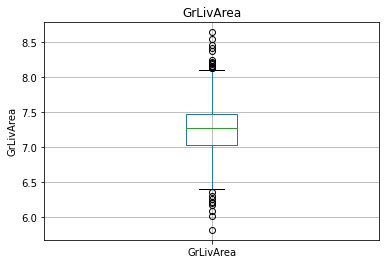

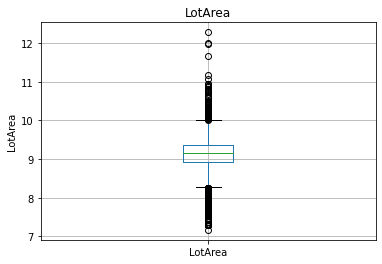

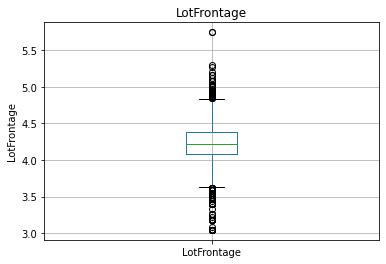

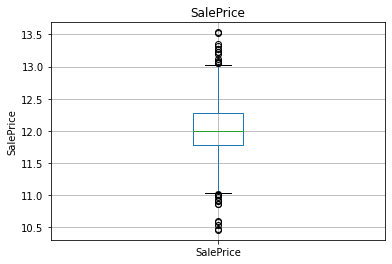

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:

categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
len(categorical_features)

43

In [ ]:
dataset[categorical_features].head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,NaN,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,NaN,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Alley and number of categories are 3
The feature is BldgType and number of categories are 5
The feature is BsmtCond and number of categories are 5
The feature is BsmtExposure and number of categories are 5
The feature is BsmtFinType1 and number of categories are 7
The feature is BsmtFinType2 and number of categories are 7
The feature is BsmtQual and number of categories are 5
The feature is CentralAir and number of categories are 2
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is Electrical and number of categories are 6
The feature is ExterCond and number of categories are 5
The feature is ExterQual and number of categories are 4
The feature is Exterior1st and number of categories are 16
The feature is Exterior2nd and number of categories are 17
The feature is Fence and number of categories are 5
The feature is FireplaceQu and number of categories are 6
The feature is Foundation and number o

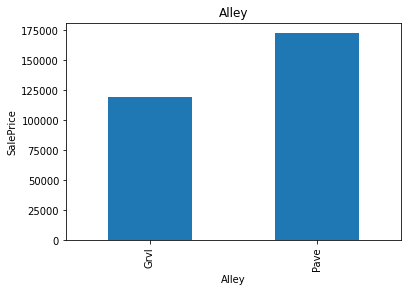

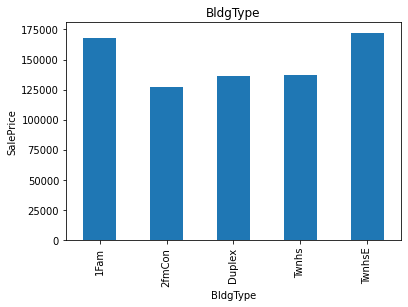

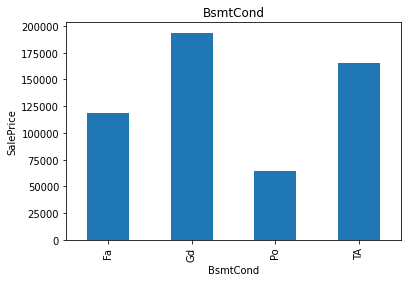

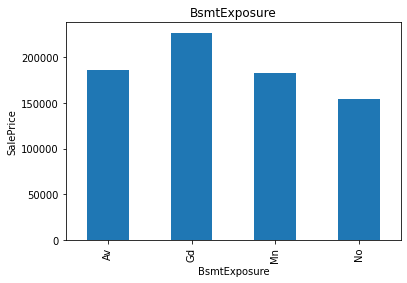

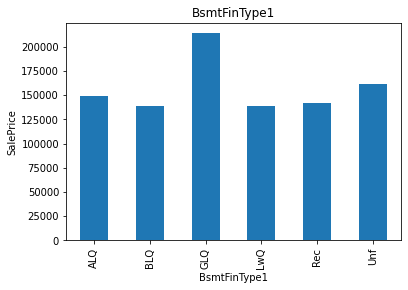

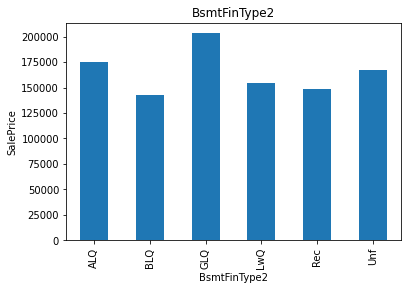

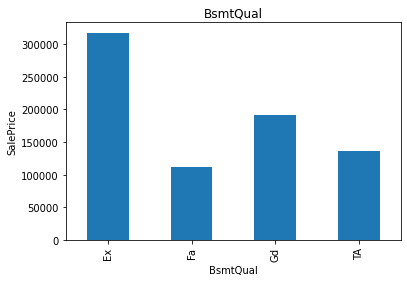

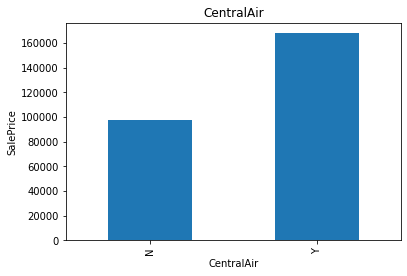

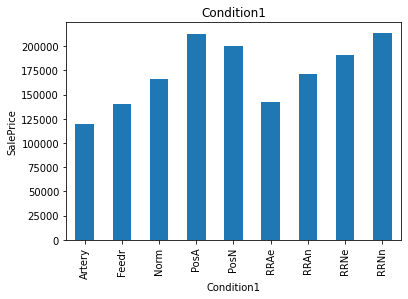

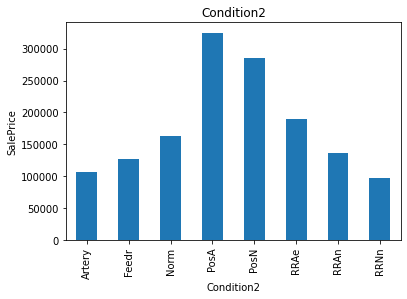

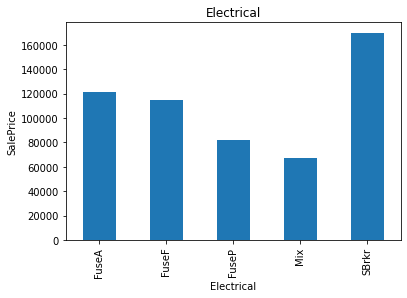

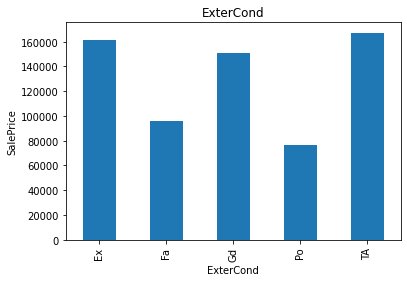

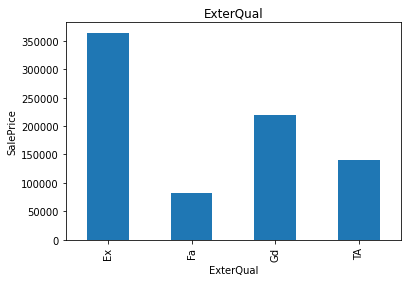

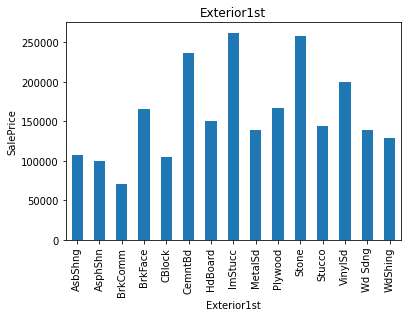

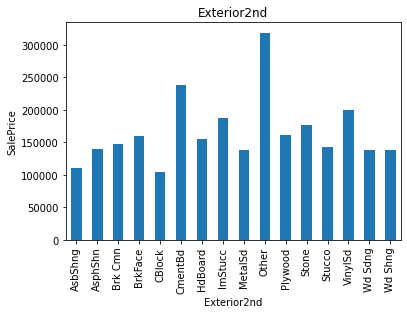

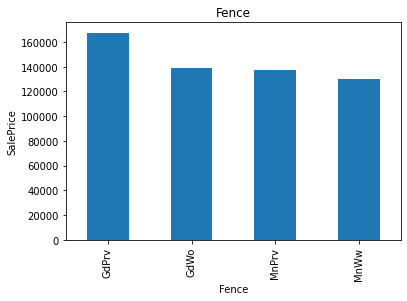

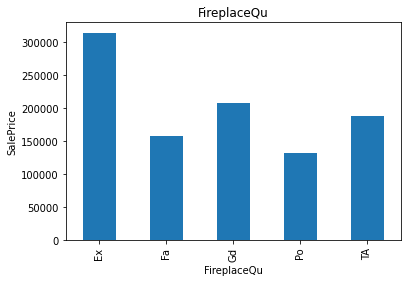

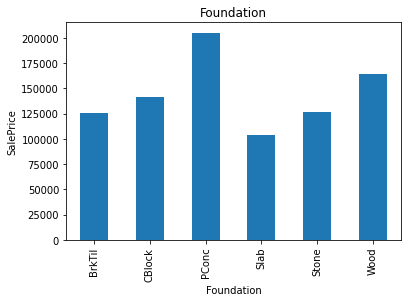

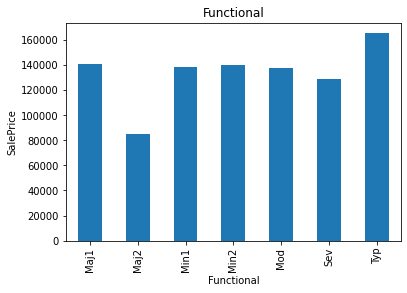

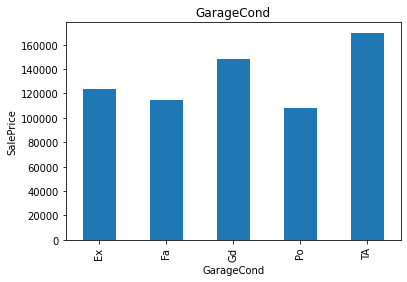

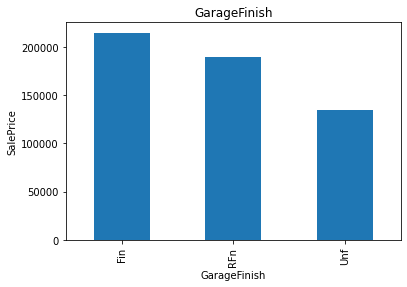

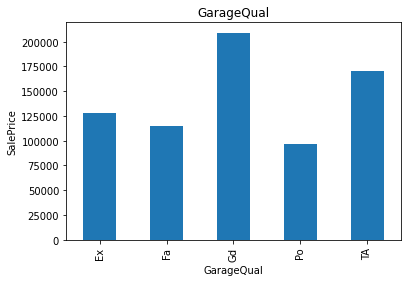

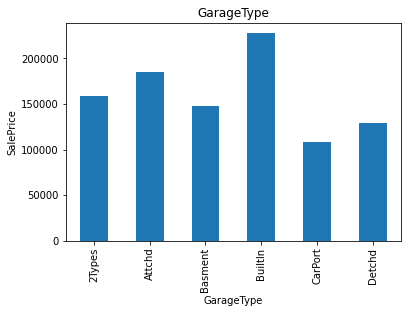

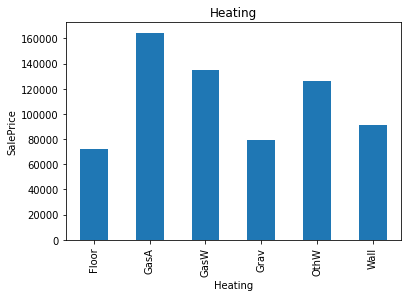

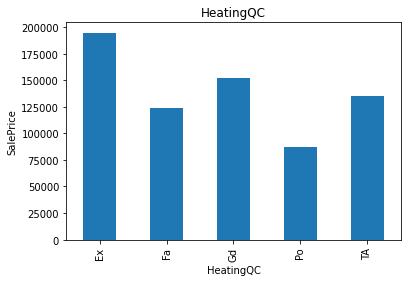

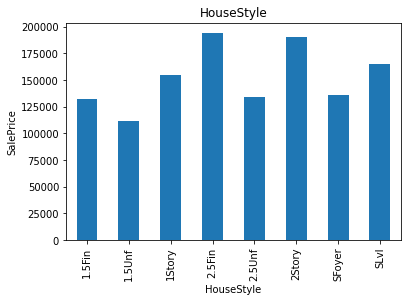

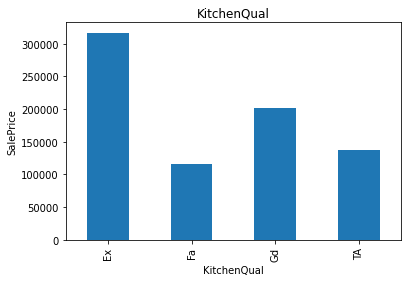

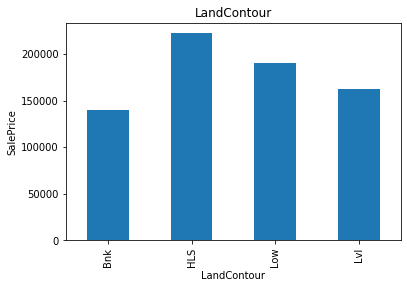

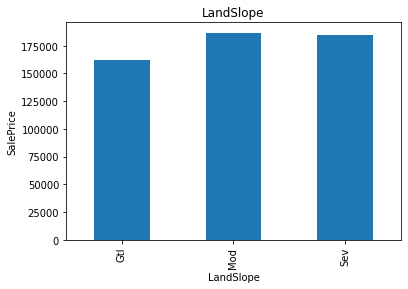

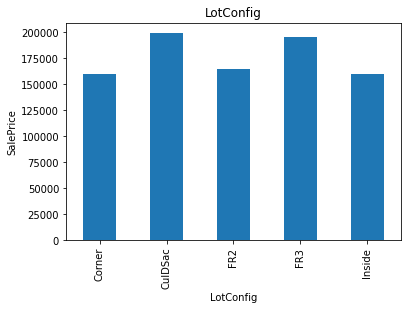

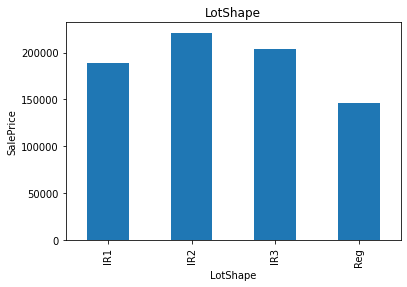

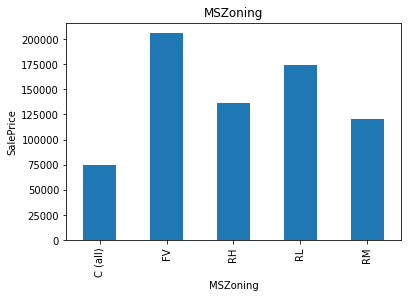

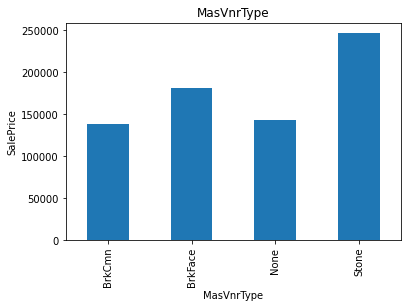

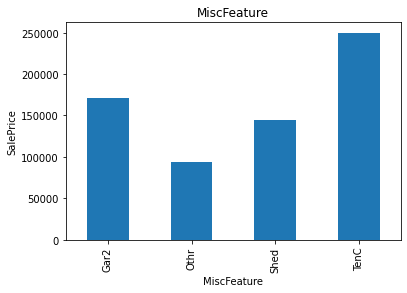

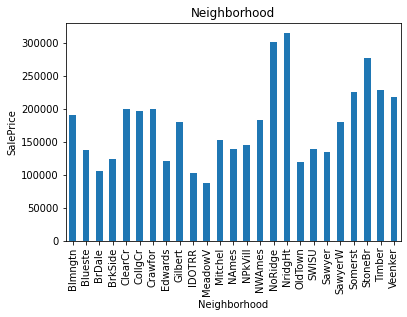

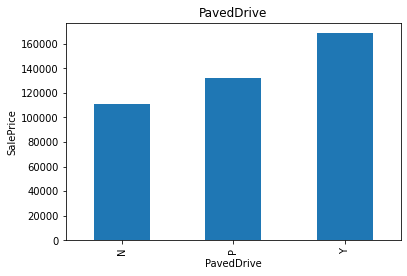

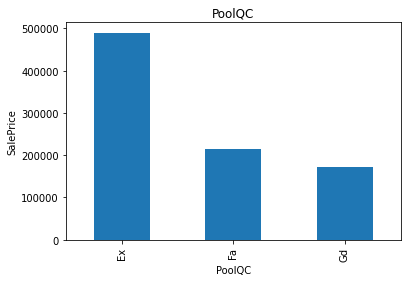

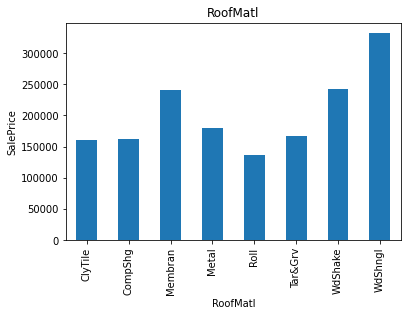

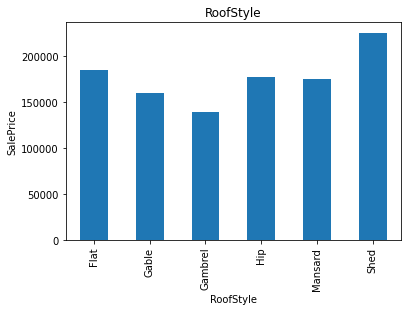

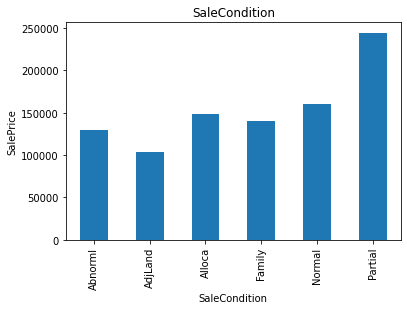

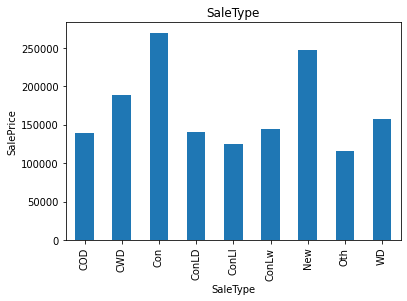

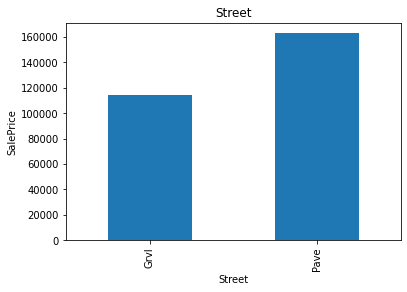

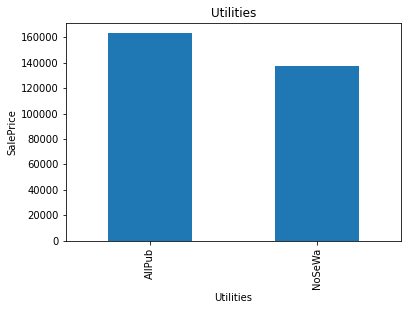

In [ ]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [ ]:
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9322% missing values
BsmtCond: 0.0281% missing values
BsmtExposure: 0.0281% missing values
BsmtFinType1: 0.0271% missing values
BsmtFinType2: 0.0274% missing values
BsmtQual: 0.0277% missing values
Fence: 0.8044% missing values
FireplaceQu: 0.4865% missing values
Functional: 0.0007% missing values
GarageCond: 0.0545% missing values
GarageFinish: 0.0545% missing values
GarageQual: 0.0545% missing values
GarageType: 0.0538% missing values
MSZoning: 0.0014% missing values
MasVnrType: 0.0082% missing values
MiscFeature: 0.964% missing values
PoolQC: 0.9966% missing values
Utilities: 0.0007% missing values


In [ ]:
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Alley           0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
BsmtQual        0
Fence           0
FireplaceQu     0
Functional      0
GarageCond      0
GarageFinish    0
GarageQual      0
GarageType      0
MSZoning        0
MasVnrType      0
MiscFeature     0
PoolQC          0
Utilities       0
dtype: int64

In [ ]:
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

BsmtFullBath: 0.0007% missing value
BsmtHalfBath: 0.0007% missing value
GarageYrBlt: 0.0545% missing value
LotFrontage: 0.1665% missing value
MasVnrArea: 0.0079% missing value
SalePrice: 0.4998% missing value


In [ ]:
dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,Missing,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,Missing,Missing,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,Missing,0,2,CollgCr,61,5,7,Y,0,Missing,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,Missing,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,Missing,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,Missing,0,5,Veenker,0,8,6,Y,0,Missing,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,Missing,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,Missing,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,Missing,0,9,CollgCr,42,5,7,Y,0,Missing,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,Missing,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,Missing,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,Missing,0,2,Crawfor,35,5,7,Y,0,Missing,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,Missing,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,Missing,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,Missing,0,12,NoRidge,84,5,8,Y,0,Missing,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [ ]:

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
LotFrontage     0
MasVnrArea      0
SalePrice       0
dtype: int64

In [ ]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [ ]:

dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [ ]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [ ]:

categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [ ]:
categorical_features

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [ ]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [ ]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,LotFrontagenan,MasVnrAreanan,SalePricenan
0,6.752270,854,0,2,3,3,3,1,706.0,0.0,6,5,1.0,0.0,3,150.0,1,2,1,3,0,3,2,10,10,4,1,0,4,2,4,548.0,2.0,3,2,2,4,5.0,7.444249,1,1,4,5,1,1,3,1,0,9.041922,0,4.174387,0,0,60,2,196.0,2,2,0,2,14,61,5,7,2,0,0,0,0,3,12.247694,2,0,1,8,856.0,1,0,5,5,2008,0,0,0,0,0,0
1,7.140453,0,0,2,3,3,3,4,978.0,0.0,4,5,0.0,1.0,3,284.0,1,1,1,3,0,3,1,4,3,4,3,1,2,2,4,460.0,2.0,3,2,2,4,31.0,7.140453,0,1,4,3,2,1,1,1,0,9.169518,2,4.382027,0,0,20,2,0.0,0,2,0,5,11,0,8,6,2,0,0,0,0,3,12.109011,2,0,1,6,1262.0,1,298,31,31,2007,0,0,0,0,0,0
2,6.824374,866,0,2,3,3,3,2,486.0,0.0,6,5,1.0,0.0,3,434.0,1,2,1,3,0,3,2,10,10,4,3,1,4,2,4,608.0,2.0,3,2,2,4,7.0,7.487734,1,1,4,5,3,1,3,1,0,9.328123,0,4.219508,1,0,60,2,162.0,2,2,0,9,14,42,5,7,2,0,0,0,0,3,12.317167,2,0,1,6,920.0,1,0,7,6,2008,0,0,0,0,0,0
3,6.867974,756,0,2,3,3,4,1,216.0,0.0,4,5,1.0,0.0,2,540.0,1,2,1,3,272,3,1,2,4,4,4,1,1,1,4,642.0,3.0,3,1,2,1,8.0,7.448334,0,1,3,5,4,1,3,1,0,9.164296,1,4.094345,1,0,70,2,0.0,0,2,0,2,15,35,5,7,2,0,0,0,0,0,11.849398,2,0,1,7,756.0,1,0,91,36,2006,0,0,0,0,0,0
4,7.043160,1053,0,2,4,3,3,3,655.0,0.0,6,5,1.0,0.0,3,490.0,1,2,1,3,0,3,2,10,10,4,3,1,4,2,4,836.0,3.0,3,2,2,4,8.0,7.695303,1,1,4,5,5,1,3,1,0,9.565214,2,4.430817,1,0,60,2,350.0,2,2,0,12,21,84,5,8,2,0,0,0,0,3,12.429216,2,0,1,9,1145.0,1,192,8,8,2008,0,0,0,0,0,0


In [ ]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

86

In [ ]:
scaling_feature

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaler.transform(dataset[feature_scale])

array([[0.34538456, 0.41355932, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4878435 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.37184571, 0.41937046, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47662332, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39126767, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.40097497, 0.48619855, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
data.head()

,Id,SalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,LotFrontagenan,MasVnrAreanan,SalePricenan
0,1,12.247694,0.345385,0.413559,0.0,1.0,0.375,0.75,0.75,0.25,0.125089,0.0,1.000000,0.833333,0.333333,0.0,0.75,0.064212,1.0,0.4,1.0,1.0,0.000000,1.0,0.666667,1.0,1.0,1.0,0.2,0.00,1.00,0.50,1.0,0.368280,0.4,1.0,0.666667,0.666667,0.8,0.652866,0.577712,0.5,1.0,1.00,1.0,0.333333,0.75,0.333333,0.0,0.366344,0.00,0.418208,0.000000,0.0,0.235294,0.666667,0.12250,0.666667,1.0,0.0,0.090909,0.666667,0.082210,0.500,0.666667,1.0,0.0,0.0,0.0,0.0,0.75,0.666667,0.0,1.0,0.461538,0.140098,1.0,0.000000,0.043796,0.112903,0.50,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.487844,0.000000,0.0,1.0,0.375,0.75,0.75,1.00,0.173281,0.0,0.666667,0.833333,0.000000,0.5,0.75,0.121575,1.0,0.2,1.0,1.0,0.000000,1.0,0.333333,0.4,0.3,1.0,0.6,0.25,0.50,0.50,1.0,0.309140,0.4,1.0,0.666667,0.666667,0.8,0.735669,0.470245,0.0,1.0,1.00,0.6,0.333333,0.25,0.333333,0.0,0.391317,0.50,0.495064,0.000000,0.0,0.000000,0.666667,0.00000,0.000000,1.0,0.0,0.363636,0.523810,0.000000,0.875,0.555556,1.0,0.0,0.0,0.0,0.0,0.75,0.666667,0.0,1.0,0.307692,0.206547,1.0,0.209270,0.233577,0.532258,0.25,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.371846,0.419370,0.0,1.0,0.375,0.75,0.75,0.50,0.086109,0.0,1.000000,0.833333,0.333333,0.0,0.75,0.185788,1.0,0.4,1.0,1.0,0.000000,1.0,0.666667,1.0,1.0,1.0,0.6,0.25,1.00,0.50,1.0,0.408602,0.4,1.0,0.666667,0.666667,0.8,0.659236,0.593095,0.5,1.0,1.00,1.0,0.333333,0.75,0.333333,0.0,0.422359,0.00,0.434909,0.333333,0.0,0.235294,0.666667,0.10125,0.666667,1.0,0.0,0.727273,0.666667,0.056604,0.500,0.666667,1.0,0.0,0.0,0.0,0.0,0.75,0.666667,0.0,1.0,0.307692,0.150573,1.0,0.000000,0.058394,0.129032,0.50,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.387847,0.366102,0.0,1.0,0.375,0.75,1.00,0.25,0.038271,0.0,0.666667,0.833333,0.333333,0.0,0.50,0.231164,1.0,0.4,1.0,1.0,0.268775,1.0,0.333333,0.2,0.4,1.0,0.8,0.25,0.25,0.25,1.0,0.431452,0.6,1.0,0.333333,0.666667,0.2,0.662420,0.579157,0.0,1.0,0.75,1.0,0.333333,0.75,0.333333,0.0,0.390295,0.25,0.388581,0.333333,0.0,0.294118,0.666667,0.00000,0.000000,1.0,0.0,0.090909,0.714286,0.047170,0.500,0.666667,1.0,0.0,0.0,0.0,0.0,0.00,0.666667,0.0,1.0,0.384615,0.123732,1.0,0.000000,0.671533,0.612903,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.452138,0.509927,0.0,1.0,0.500,0.75,0.75,0.75,0.116052,0.0,1.000000,0.833333,0.333333,0.0,0.75,0.209760,1.0,0.4,1.0,1.0,0.000000,1.0,0.666667,1.0,1.0,1.0,0.6,0.25,1.00,0.50,1.0,0.561828,0.6,1.0,0.666667,0.666667,0.8,0.662420,0.666523,0.5,1.0,1.00,1.0,0.333333,0.75,0.333333,0.0,0.468761,0.50,0.513123,0.333333,0.0,0.235294,0.666667,0.21875,0.666667,1.0,0.0,1.000000,1.000000,0.113208,0.500,0.777778,1.0,0.0,0.0,0.0,0.0,0.75,0.666667,0.0,1.0,0.538462,0.187398,1.0,0.134831,0.065693,0.161290,0.50,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.shape

(2919, 87)

In [ ]:
data.isnull().sum()

Id                 0
SalePrice          0
1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley              0
BedroomAbvGr       0
BldgType           0
BsmtCond           0
BsmtExposure       0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1       0
BsmtFinType2       0
BsmtFullBath       0
BsmtHalfBath       0
BsmtQual           0
BsmtUnfSF          1
CentralAir         0
Condition1         0
Condition2         0
Electrical         0
EnclosedPorch      0
ExterCond          0
ExterQual          0
Exterior1st        0
Exterior2nd        0
Fence              0
FireplaceQu        0
Fireplaces         0
Foundation         0
FullBath           0
Functional         0
GarageArea         1
GarageCars         1
GarageCond         0
GarageFinish       0
GarageQual         0
GarageType         0
GarageYrBlt        0
GrLivArea          0
HalfBath           0
Heating            0
HeatingQC          0
HouseStyle         0
KitchenAbvGr       0
KitchenQual        0
LandContour  

In [ ]:
data['GarageArea']=data['GarageArea'].fillna(data['GarageArea'].mean())
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())
data['GarageCars']=data['GarageCars'].fillna(data['GarageCars'].mean())
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean())
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean())
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())


In [ ]:
data.isnull().sum()

Id                 0
SalePrice          0
1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley              0
BedroomAbvGr       0
BldgType           0
BsmtCond           0
BsmtExposure       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtFinType1       0
BsmtFinType2       0
BsmtFullBath       0
BsmtHalfBath       0
BsmtQual           0
BsmtUnfSF          0
CentralAir         0
Condition1         0
Condition2         0
Electrical         0
EnclosedPorch      0
ExterCond          0
ExterQual          0
Exterior1st        0
Exterior2nd        0
Fence              0
FireplaceQu        0
Fireplaces         0
Foundation         0
FullBath           0
Functional         0
GarageArea         0
GarageCars         0
GarageCond         0
GarageFinish       0
GarageQual         0
GarageType         0
GarageYrBlt        0
GrLivArea          0
HalfBath           0
Heating            0
HeatingQC          0
HouseStyle         0
KitchenAbvGr       0
KitchenQual        0
LandContour  

In [ ]:
y_train = data[['SalePrice']]

In [ ]:
y_train.shape

(2919, 1)

In [ ]:
X = data.drop(['Id','SalePrice'],axis=1)

In [ ]:
X.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,LotFrontagenan,MasVnrAreanan,SalePricenan
0,0.345385,0.413559,0.0,1.0,0.375,0.75,0.75,0.25,0.125089,0.0,1.000000,0.833333,0.333333,0.0,0.75,0.064212,1.0,0.4,1.0,1.0,0.000000,1.0,0.666667,1.0,1.0,1.0,0.2,0.00,1.00,0.50,1.0,0.368280,0.4,1.0,0.666667,0.666667,0.8,0.652866,0.577712,0.5,1.0,1.00,1.0,0.333333,0.75,0.333333,0.0,0.366344,0.00,0.418208,0.000000,0.0,0.235294,0.666667,0.12250,0.666667,1.0,0.0,0.090909,0.666667,0.082210,0.500,0.666667,1.0,0.0,0.0,0.0,0.0,0.75,0.666667,0.0,1.0,0.461538,0.140098,1.0,0.000000,0.043796,0.112903,0.50,0.0,0.0,0.0,0.0,0.0,0.0
1,0.487844,0.000000,0.0,1.0,0.375,0.75,0.75,1.00,0.173281,0.0,0.666667,0.833333,0.000000,0.5,0.75,0.121575,1.0,0.2,1.0,1.0,0.000000,1.0,0.333333,0.4,0.3,1.0,0.6,0.25,0.50,0.50,1.0,0.309140,0.4,1.0,0.666667,0.666667,0.8,0.735669,0.470245,0.0,1.0,1.00,0.6,0.333333,0.25,0.333333,0.0,0.391317,0.50,0.495064,0.000000,0.0,0.000000,0.666667,0.00000,0.000000,1.0,0.0,0.363636,0.523810,0.000000,0.875,0.555556,1.0,0.0,0.0,0.0,0.0,0.75,0.666667,0.0,1.0,0.307692,0.206547,1.0,0.209270,0.233577,0.532258,0.25,0.0,0.0,0.0,0.0,0.0,0.0
2,0.371846,0.419370,0.0,1.0,0.375,0.75,0.75,0.50,0.086109,0.0,1.000000,0.833333,0.333333,0.0,0.75,0.185788,1.0,0.4,1.0,1.0,0.000000,1.0,0.666667,1.0,1.0,1.0,0.6,0.25,1.00,0.50,1.0,0.408602,0.4,1.0,0.666667,0.666667,0.8,0.659236,0.593095,0.5,1.0,1.00,1.0,0.333333,0.75,0.333333,0.0,0.422359,0.00,0.434909,0.333333,0.0,0.235294,0.666667,0.10125,0.666667,1.0,0.0,0.727273,0.666667,0.056604,0.500,0.666667,1.0,0.0,0.0,0.0,0.0,0.75,0.666667,0.0,1.0,0.307692,0.150573,1.0,0.000000,0.058394,0.129032,0.50,0.0,0.0,0.0,0.0,0.0,0.0
3,0.387847,0.366102,0.0,1.0,0.375,0.75,1.00,0.25,0.038271,0.0,0.666667,0.833333,0.333333,0.0,0.50,0.231164,1.0,0.4,1.0,1.0,0.268775,1.0,0.333333,0.2,0.4,1.0,0.8,0.25,0.25,0.25,1.0,0.431452,0.6,1.0,0.333333,0.666667,0.2,0.662420,0.579157,0.0,1.0,0.75,1.0,0.333333,0.75,0.333333,0.0,0.390295,0.25,0.388581,0.333333,0.0,0.294118,0.666667,0.00000,0.000000,1.0,0.0,0.090909,0.714286,0.047170,0.500,0.666667,1.0,0.0,0.0,0.0,0.0,0.00,0.666667,0.0,1.0,0.384615,0.123732,1.0,0.000000,0.671533,0.612903,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.452138,0.509927,0.0,1.0,0.500,0.75,0.75,0.75,0.116052,0.0,1.000000,0.833333,0.333333,0.0,0.75,0.209760,1.0,0.4,1.0,1.0,0.000000,1.0,0.666667,1.0,1.0,1.0,0.6,0.25,1.00,0.50,1.0,0.561828,0.6,1.0,0.666667,0.666667,0.8,0.662420,0.666523,0.5,1.0,1.00,1.0,0.333333,0.75,0.333333,0.0,0.468761,0.50,0.513123,0.333333,0.0,0.235294,0.666667,0.21875,0.666667,1.0,0.0,1.000000,1.000000,0.113208,0.500,0.777778,1.0,0.0,0.0,0.0,0.0,0.75,0.666667,0.0,1.0,0.538462,0.187398,1.0,0.134831,0.065693,0.161290,0.50,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(2919, 85)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function

feature_sel_model1 = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False])

In [ ]:
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 85
selected features: 11


In [ ]:
selected_feat

Index(['BsmtExposure', 'CentralAir', 'FireplaceQu', 'GarageFinish', 'GarageType', 'GrLivArea', 'KitchenQual', 'MasVnrType', 'Neighborhood', 'OverallQual', 'YearRemodAdd'], dtype='object')

In [ ]:
selected_feat.shape

(11,)

In [ ]:
X_train=X[selected_feat]

In [ ]:
X_train.shape

(2919, 11)

In [ ]:
df_Train=X_train.iloc[:1460,:]
df_Test=X_train.iloc[1460:,:]

In [ ]:
df_Train.shape

(1460, 11)

In [ ]:
df_Test.shape

(1459, 11)

In [ ]:
df_Test.head()

,BsmtExposure,CentralAir,FireplaceQu,GarageFinish,GarageType,GrLivArea,KitchenQual,MasVnrType,Neighborhood,OverallQual,YearRemodAdd
1460,0.25,1.0,0.2,0.333333,0.8,0.349081,0.25,0.000000,0.380952,0.444444,0.822581
1461,0.25,1.0,0.2,0.333333,0.8,0.488544,0.75,0.666667,0.380952,0.555556,0.870968
1462,0.25,1.0,0.6,1.000000,0.8,0.560546,0.25,0.000000,0.619048,0.444444,0.225806
1463,0.25,1.0,0.8,1.000000,0.8,0.555075,0.75,0.666667,0.619048,0.555556,0.225806
1464,0.25,1.0,0.2,0.666667,0.8,0.475254,0.75,0.000000,0.904762,0.777778,0.322581


In [ ]:
df_Train.head()

,BsmtExposure,CentralAir,FireplaceQu,GarageFinish,GarageType,GrLivArea,KitchenQual,MasVnrType,Neighborhood,OverallQual,YearRemodAdd
0,0.25,1.0,0.2,0.666667,0.8,0.577712,0.75,0.666667,0.666667,0.666667,0.112903
1,1.00,1.0,0.6,0.666667,0.8,0.470245,0.25,0.000000,0.523810,0.555556,0.532258
2,0.50,1.0,0.6,0.666667,0.8,0.593095,0.75,0.666667,0.666667,0.666667,0.129032
3,0.25,1.0,0.8,0.333333,0.2,0.579157,0.75,0.000000,0.714286,0.666667,0.612903
4,0.75,1.0,0.6,0.666667,0.8,0.666523,0.75,0.666667,1.000000,0.777778,0.161290


In [ ]:
from sklearn.linear_model import Ridge 
linridge = Ridge(alpha=2.18)

In [ ]:
y_train.shape

(2919, 1)

In [ ]:
Y_train=y_train.iloc[:1460,:]

In [ ]:
Y_train.shape

(1460, 1)

In [ ]:
linridge.fit(df_Train, Y_train)

Ridge(alpha=2.18, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_predicted = linridge.predict(df_Test)

In [ ]:
y_predicted

array([[11.62323684],
       [11.89735971],
       [12.06682145],
       ...,
       [11.81554962],
       [11.72035028],
       [12.29413275]])

In [ ]:
sub = pd.read_csv('/content/sample_submission.csv')

In [ ]:
pred=pd.DataFrame(y_predicted)

datasets=pd.concat([sub['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission50.csv',index=False)